In [1]:
!rm "resizedGearImages/.DS_Store"

rm: resizedGearImages/.DS_Store: No such file or directory


In [2]:
import os
import numpy as np
from PIL import Image
classNames = []
features = []
labels = []

classNameId = 1

rootdir = "resizedGearImages"

classNames = os.listdir(rootdir)

for folder in classNames:
    files = os.listdir(os.path.join(rootdir,folder))
    for file in files:
        img = Image.open(os.path.join(rootdir,folder,file))
        features.append(np.array(img).ravel())
        labels.append(classNameId)
    classNameId+=1
    
features = np.array(features)
labels = np.array(labels)

print("Loaded {} images of {} classes".format(len(features),len(classNames)))

Loaded 2122 images of 12 classes


In [3]:
# split the image data into training and testing sets
from sklearn.model_selection import train_test_split

xTrain, xTest, yTrain, yTest = train_test_split(features, labels, test_size=0.30)

print(xTrain.shape)
print(yTrain.shape)

(1485, 49152)
(1485,)


In [4]:
# Train a classifier
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

# Create a pipeline (in case we want to add transformations later)
pipeline = Pipeline([('classify', RandomForestClassifier()),
                        ])
# Use the pipeline to fit a model to the training data
print("Training model...")
classifier = pipeline.fit(xTrain, yTrain)

print('classifier trained!')

Training model...
classifier trained!


In [5]:
# Evaluate classifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import numpy as np

print('Calculating classifier metrics...')
predictions = classifier.predict(xTest)
print(metrics.classification_report(yTest, predictions, target_names=classNames))
print('Accuracy:' + str(metrics.accuracy_score(yTest, predictions)))

print("\n Confusion Matrix:")
cm = confusion_matrix(yTest, np.round(predictions, 0))
print(cm)

Calculating classifier metrics...
                   precision    recall  f1-score   support

             axes       0.96      1.00      0.98        26
            boots       0.95      1.00      0.98        40
       carabiners       0.97      0.93      0.95        72
         crampons       0.77      0.89      0.83        27
           gloves       0.75      0.84      0.79        63
hardshell_jackets       0.72      0.85      0.78       129
        harnesses       0.90      0.81      0.85        53
          helmets       1.00      1.00      1.00        27
insulated_jackets       0.69      0.51      0.58        83
          pulleys       1.00      0.22      0.36         9
             rope       0.86      0.81      0.84        69
            tents       0.95      1.00      0.97        39

      avg / total       0.83      0.83      0.82       637

Accuracy:0.830455259027

 Confusion Matrix:
[[ 26   0   0   0   0   0   0   0   0   0   0   0]
 [  0  40   0   0   0   0   0   0   0   0 

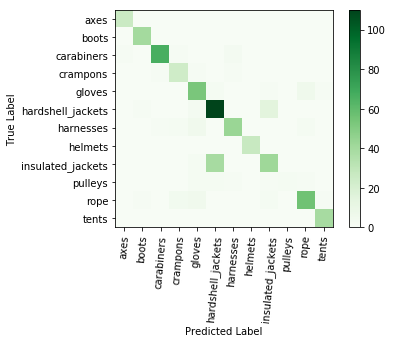

In [6]:
# Plot confusion matrix as heatmap
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Greens)
plt.colorbar()
tickMarks = np.arange(len(classNames))
plt.xticks(tickMarks, classNames, rotation=85)
plt.yticks(tickMarks, classNames)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [7]:
# function to resize new images to match training data
def resize_image(img, size=(128,128)):
    from PIL import Image
    import numpy as np
    
    # Create a white image of the target size
    newimg = Image.new("RGB", size, (255, 255, 255))
        
    # resize the source image (if not square, this will scale largest dimension to size)
    img.thumbnail(size, Image.ANTIALIAS)
    
    # paste the resized source image into the middle of the target image
    newimg.paste(img, (int((size[0] - img.size[0]) / 2), int((size[1] - img.size[1]) / 2)))
    
    return newimg

def resize(img): 
    from PIL import Image, ImageOps 
    size = (128,128)
    # Convert RGBA images to RGB
    if np.array(img).shape[2] == 4:
        img = img.convert('RGB')
        
    # resize the image
    img.thumbnail(size, Image.ANTIALIAS)
    newimg = Image.new("RGB", size, (255, 255, 255))
    newimg.paste(img, (int((size[0] - img.size[0]) / 2), int((size[1] - img.size[1]) / 2)))
  
    # return the resized image
    return newimg


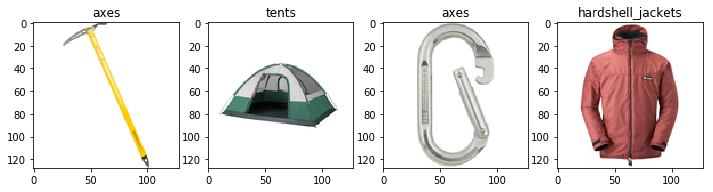

In [9]:
# Predict class for new data
from PIL import Image, ImageOps
import requests
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from urllib.request import urlopen
%matplotlib inline

image_urls = []
image_urls.append('https://i.stack.imgur.com/HeliW.jpg')
image_urls.append('https://productimages.camping-gear-outlet.com/e5/62379.jpg')
image_urls.append('http://s7d1.scene7.com/is/image/MoosejawMB/MIKAJMKFMKCAPNABx1024698_zm?$product1000$')
image_urls.append('http://www.buffalosystems.co.uk/wp-content/uploads/2012/06/zoom_apline_jacket_dark_russet-2365x3286.jpg')

numberOfImages = len(image_urls)
fig = plt.figure(figsize=(12, 12))
i=0
# Get the images and show the predicted classes
for image in image_urls:
    img = Image.open(urlopen(image))

    #img = resize_image(img, (128,128))
    img = resize(img)

    # Flatten the image data to correct feature format
    imgfeatures = np.array(img).ravel().reshape(1, -1)
    
    # predict the class for the new image
    classIdx =  classifier.predict(imgfeatures)
    className = classNames[int(classIdx)-1]
    a=fig.add_subplot(1,numberOfImages,i+1)
    imgplot = plt.imshow(img)
    a.set_title(className)
    i+=1